In [114]:
#loading data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_data = pd.read_csv('train.csv')

In [115]:
titanic_data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [116]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [117]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [118]:
# Count unique values in specific categorical columns
categorical_cols = titanic_data.select_dtypes(include=['object', 'category']).columns
titanic_data[categorical_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [119]:
# Fill missing 'Age' with median of each 'Pclass' group
titanic_data['Age'] = titanic_data['Age'].fillna(
    titanic_data.groupby('Pclass')['Age'].transform('median'))

In [120]:
# Fill missing "Embarked" with its mode
x = titanic_data["Embarked"].mode()[0]  
titanic_data.fillna({"Embarked": x}, inplace=True)

# mode() returns a Series, not a single value, even if there's only one most frequent value. 
# You need to extract the first mode using .mode()[0]

In [121]:
# Drop Cabin column (too many missing values)
titanic_data.drop('Cabin', axis=1, inplace=True)

In [122]:
# Convert Sex to numerical: male → 0, female → 1
titanic_data["Sex"] = titanic_data["Sex"].map({'male': 0, 'female': 1})
# type conversions liek object being used as a string can
# sometimes lead to issues where "male" doesnt equal 'male' so be careful of that

In [123]:
# FamilySize: Sum of Siblings/Spouses Aboard + Parents/Children Aboard + 1
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
# note that .sum() sums the whole column, not just the row

In [124]:
# IsAlone: Binary flag (1 if FamilySize = 1)
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)
# titanic_data['FamilySize'] == 1 creates a boolean Series (True/False)
#  .astype(int) converts True to 1 and False to 0

In [125]:
# AgeGroup: Categorical bins (Child: <13, Teen: 13-19, Adult: 20-59, Senior: 60+)
# method 1, works and is very easy to read. 
titanic_data['AgeGroup'] = titanic_data['Age'].apply(
    lambda x: 'Child' if x < 13 else
              'Teen' if 13 <= x < 20 else
              'Adult' if 20 <= x < 60 else
              'Senior'
)
bins = [0, 12, 19, 59, float('inf')]
labels = ['Child', 'Teen', 'Adult', 'Senior']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=False)
# method 2, uses pd.cut() more efficent and handles NaN
# The right=False parameter makes intervals left-closed [a, b)
# Use float('inf') for the upper bound of the last category

In [126]:
# Overall survival rate
total_survival_rate = titanic_data['Survived'].mean()
# Survival rate by gender
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean()
# Survival rate by passenger class (Pclass)
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
# Survival rate for passengers traveling alone vs. with family
survival_by_family = titanic_data.groupby('IsAlone')['Survived'].mean()

In [127]:
# Top 3 age groups with highest survival rate
top_3_age_groups = (titanic_data.groupby('AgeGroup', observed=True)['Survived']
                      .mean()
                      .sort_values(ascending=False)
                      .head(3))
# or could use: # Calculate survival rate by age group
# survival_by_age_group = titanic_data.groupby('AgeGroup')['Survived'].mean()
# Get top 3 age groups with highest survival rate
# top_3_age_groups = survival_by_age_group.sort_values(ascending=False).head(3)

In [128]:
# Average age by Pclass
average_age_pclass = titanic_data.groupby('Pclass')['Age'].mean()
# Survival rate by pclass
survival_pclass = titanic_data.groupby('Pclass')['Survived'].mean()
# median fare by pclass
median_fare_pclass = titanic_data.groupby('Pclass')['Fare'].median()

<Axes: title={'center': 'Survival Rate by Age Group and Sex'}, xlabel='Age Group', ylabel='Survival Rate'>

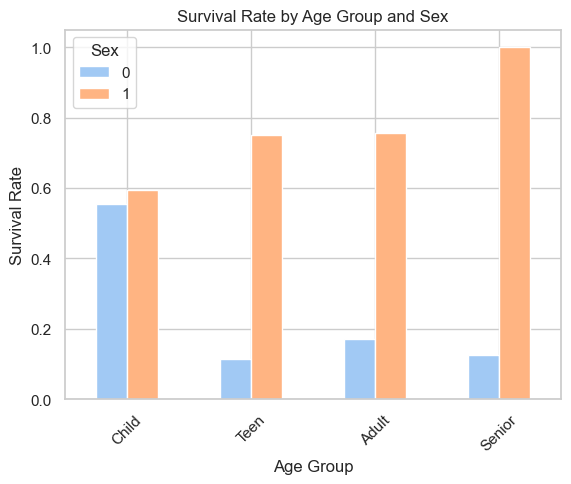

In [129]:
# pivot plot for suvival rate by agegroup and sex
pivot = titanic_data.pivot_table(
    observed=True,
    index="AgeGroup",    # What goes on the left (rows)
    columns="Sex",    # What breaks into columns
    values="Survived",    # What to aggregate
    aggfunc="mean"      # How to aggregate (sum, mean, count, etc.)
)
pivot.plot(
    kind="bar", 
    title="Survival Rate by Age Group and Sex",
    ylabel="Survival Rate",
    xlabel="Age Group",
    rot=45  # Rotate x-axis labels for readability
)

<Axes: title={'center': 'Survival rate by passenger class'}, xlabel='Pclass'>

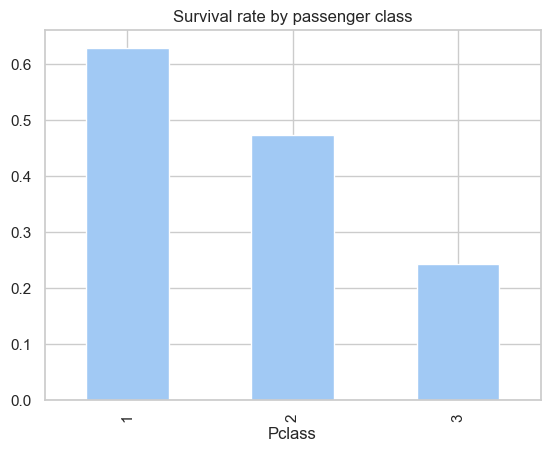

In [130]:
# Bar plot
titanic_data.groupby('Pclass')['Survived'].mean().plot(kind='bar', title='Survival rate by passenger class')

Text(0, 0.5, '')

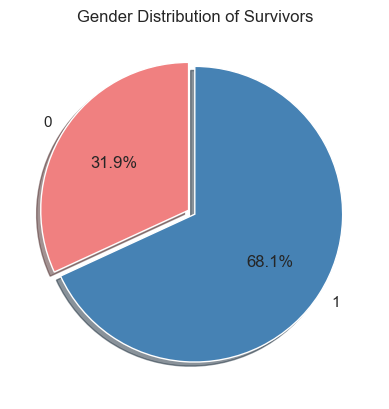

In [131]:
# Pie chart: Gender distribution of survivors
titanic_data[titanic_data['Survived'] == 1].groupby('Sex')['Survived'].sum().plot(
          kind='pie',  # Filter survivors only   # Count survivors by gender
          autopct='%.1f%%',                   # Show percentages
          title='Gender Distribution of Survivors',
          colors=['lightcoral', 'steelblue'],  # Custom colors
          startangle=90,                       # Rotate for better readability
          explode=(0.05, 0),                   # Slightly separate slices
          shadow=True)                         # Add shadow for depth
plt.ylabel('')  # Remove default y-label ("Survived")

([<matplotlib.axis.XTick at 0x145985950>,
 [Text(1, 0, 'Died'), Text(2, 0, 'Survived')])

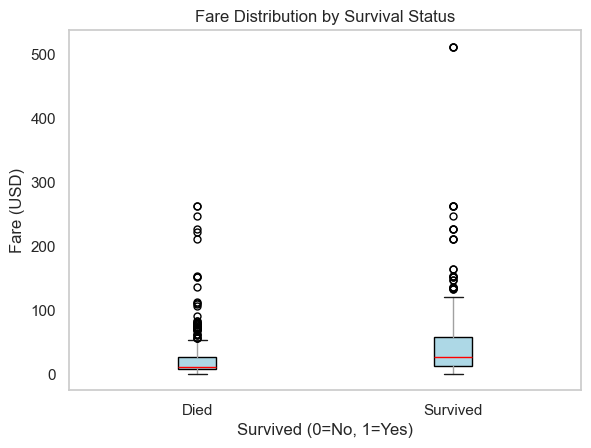

In [132]:
# Box plot: Fare distribution by survival status
titanic_data.boxplot(
    column='Fare', 
    by='Survived',
    grid=False,
    patch_artist=True,  # Color the boxes
    boxprops=dict(facecolor='lightblue'),  # Box color
    medianprops=dict(color='red'),  # Median line color
    flierprops=dict(marker='o', markersize=5)  # Outlier style
)
plt.title('Fare Distribution by Survival Status')
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Fare (USD)')
plt.xticks([1, 2], ['Died', 'Survived'])  # Replace 0/1 with labels

In [133]:
# Histogram: Age distribution with KDE curve
# not possible without extra imports like seaborn!

In [134]:
# Save cleaned dataset as titanic_clean.csv
titanic_data.to_csv('titanic_clean.csv', index=False)
# the index=False parameter tells pandas not to write the DataFrame's index (row numbers) into the CSV file

<Axes: xlabel='Age', ylabel='Density'>

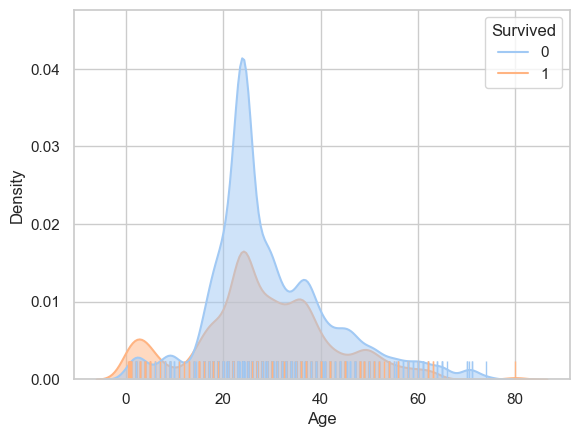

In [135]:
sns.set_theme(context="notebook", style="whitegrid", palette="pastel")
# sns.countplot(data=titanic_data, x="Pclass", hue="Survived")
# Age & Survival:
# Plot overlapping KDE distributions of age for survivors/non-survivors
# Add rugplot and set bw_adjust=0.5 for better detail
sns.kdeplot(data=titanic_data, x="Age", hue="Survived", 
           bw_adjust=0.5, fill=True, alpha=0.5, linewidth=1.5)
sns.rugplot(data=titanic_data, x="Age", hue="Survived", height=.05)

/var/folders/w9/3r5g_91568315hgnfn767r_w0000gn/T/ipykernel_90071/1774196122.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxenplot(
/Users/joeyburk/my_python_env/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/joeyburk/my_python_env/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


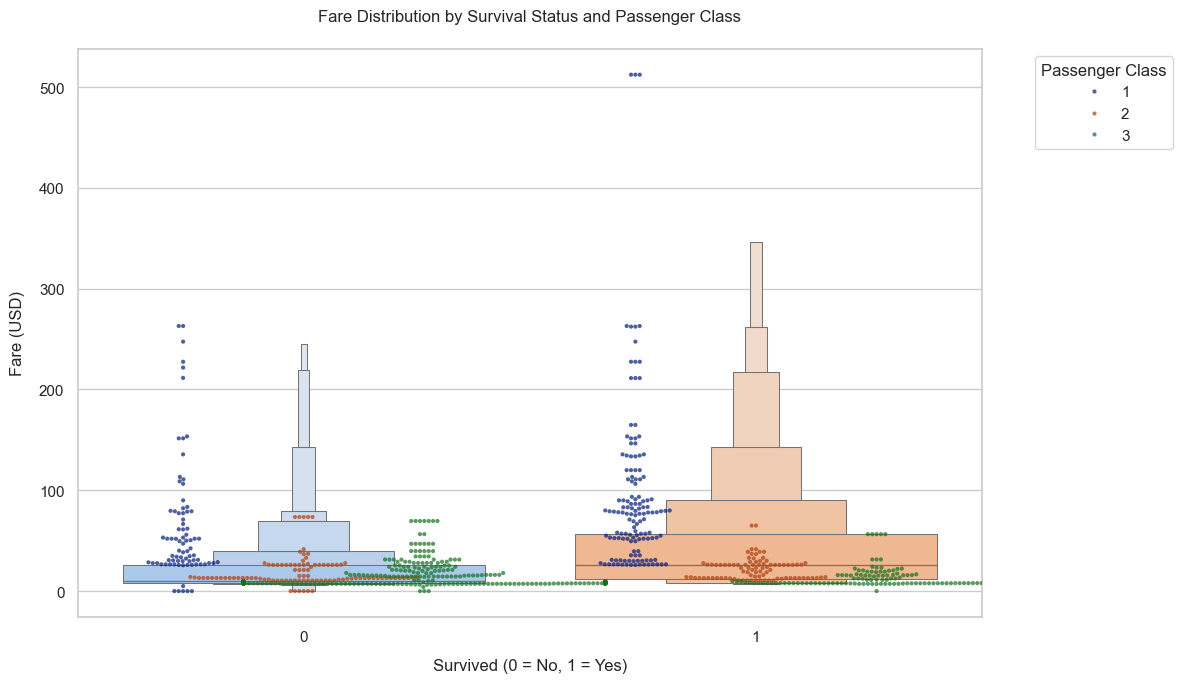

In [136]:
# Fare Impact:
# Make a boxenplot of fare amounts by survival status
# Set up the figure
plt.figure(figsize=(12, 7))

# 1. Create boxenplot (enhanced boxplot) for fare by survival
ax = sns.boxenplot(
    data=titanic_data,
    x="Survived",
    y="Fare",
    palette="pastel",
    k_depth="trustworthy",
    showfliers=False
)

# 2. Add swarmplot with adjusted parameters to prevent overlap
sns.swarmplot(
    data=titanic_data,
    x="Survived",
    y="Fare",
    hue="Pclass",
    palette="dark",
    size=3,  # Reduced size to fit more points
    alpha=0.7,
    dodge=True,  # Separate points by hue category
    ax=ax
)

# Customize the plot
plt.title("Fare Distribution by Survival Status and Passenger Class", pad=20)
plt.xlabel("Survived (0 = No, 1 = Yes)", labelpad=10)
plt.ylabel("Fare (USD)", labelpad=10)
plt.legend(title="Passenger Class", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent legend cutoff
plt.tight_layout()
plt.show()

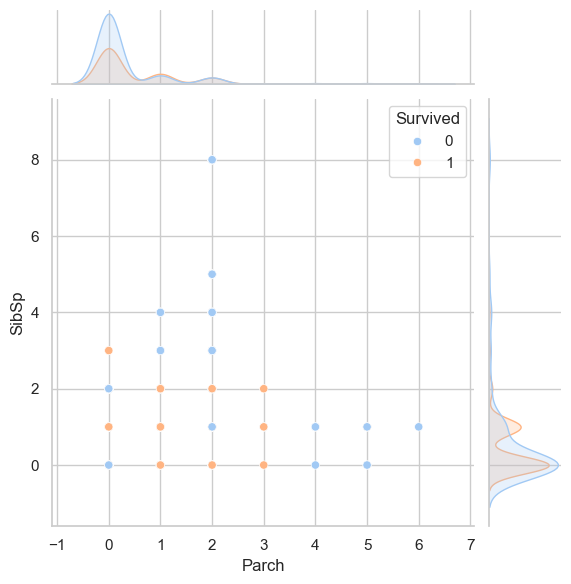

In [137]:
# Family Size:
# Create a clustered bar chart showing survival rates by SibSp (siblings/spouses) and Parch (parents/children)
# Use estimator=np.mean in barplot
sns.jointplot(data=titanic_data, x="Parch", y="SibSp", hue="Survived")

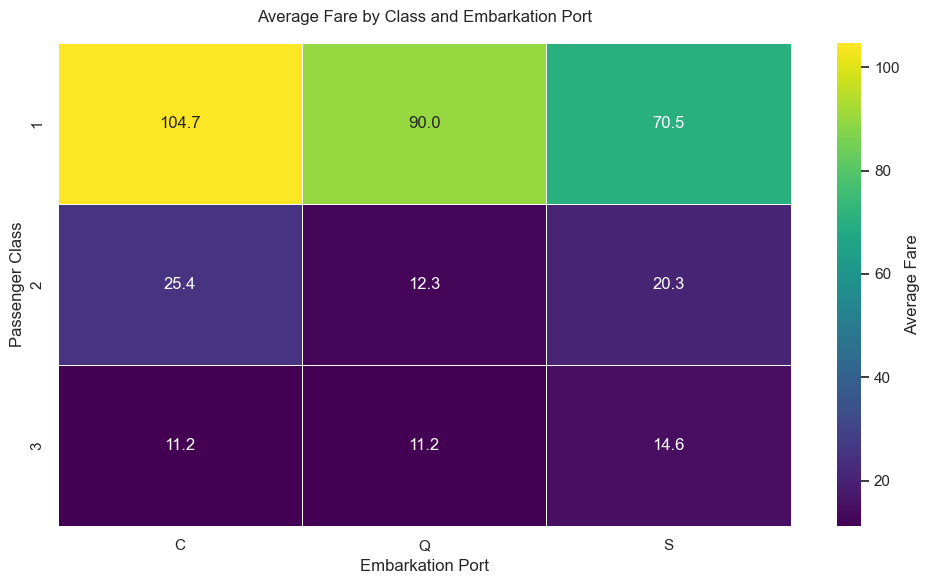

In [138]:
# Class & Embarkation:
# Create a heatmap of average fare by class and embarkation port
# Annotate cells with values and use cmap="viridis"
# need to mess with the data first
# Data preparation: Group by class and embark_town, calculate average fare
heatmap_data = titanic_data.groupby(['Pclass', 'Embarked'])['Fare'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heatmap_data,
    annot=True,            # Show values in cells
    fmt=".1f",             # Format as 1 decimal place
    linewidths=.5,         # Add lines between cells
    cmap="viridis",        # Use viridis color map
    cbar_kws={'label': 'Average Fare'}  # Colorbar label
)

# Customize labels and title
plt.title("Average Fare by Class and Embarkation Port", pad=15)
plt.xlabel("Embarkation Port")
plt.ylabel("Passenger Class")
plt.tight_layout()

# Show the plot
plt.show()

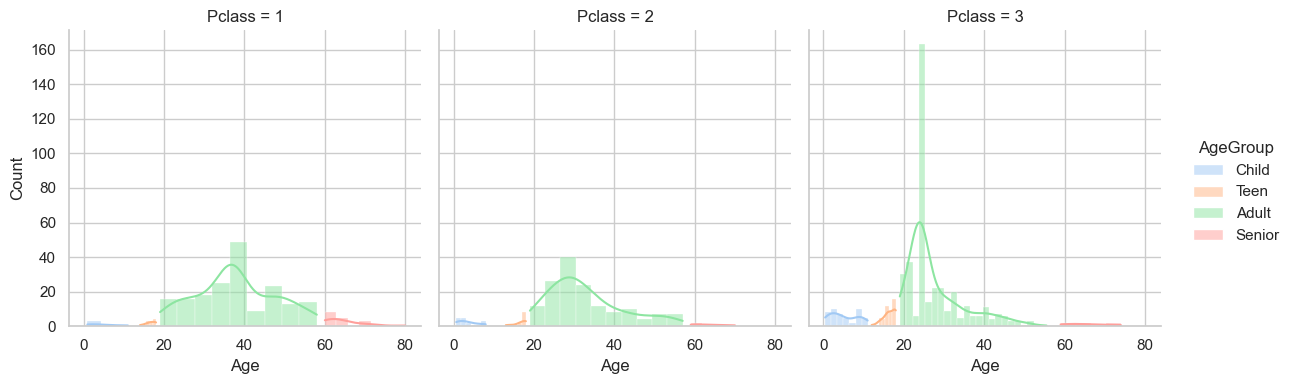

In [139]:
# Age Distributions:
# Plot faceted histograms of age by passenger class
# Add KDE overlay and set common_bins=False
sns.displot(
    data=titanic_data,
    x="Age",
    col="Pclass",
    hue="AgeGroup",        # Creates separate columns for each class
    kde=True,             # Adds KDE overlay
    common_bins=False,    # Each plot gets its own bin range
    height=4,
    aspect=1
)

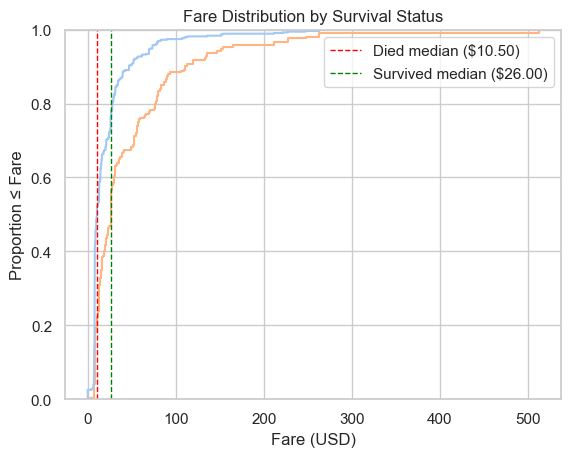

In [140]:
# Fare Distribution:
# Create ECDF plot of fares colored by survival status
# Add vertical lines at median values
fig, ax = plt.subplots()

# Create ECDF plot directly on our axis
sns.ecdfplot(
    data=titanic_data,
    x="Fare",
    hue="Survived",
    ax=ax  # Use our pre-created axis
)

# Calculate correct medians (single value per group)
median_survived = titanic_data[titanic_data['Survived'] == 1]['Fare'].median()
median_died = titanic_data[titanic_data['Survived'] == 0]['Fare'].median()

# Add vertical lines for each median
ax.axvline(x=median_died, color='red', linestyle='--', linewidth=1, label=f'Died median (${median_died:.2f})')
ax.axvline(x=median_survived, color='green', linestyle='--', linewidth=1, label=f'Survived median (${median_survived:.2f})')

# Customize plot
ax.set_title('Fare Distribution by Survival Status')
ax.set_xlabel('Fare (USD)')
ax.set_ylabel('Proportion ≤ Fare')
ax.legend()

plt.show()

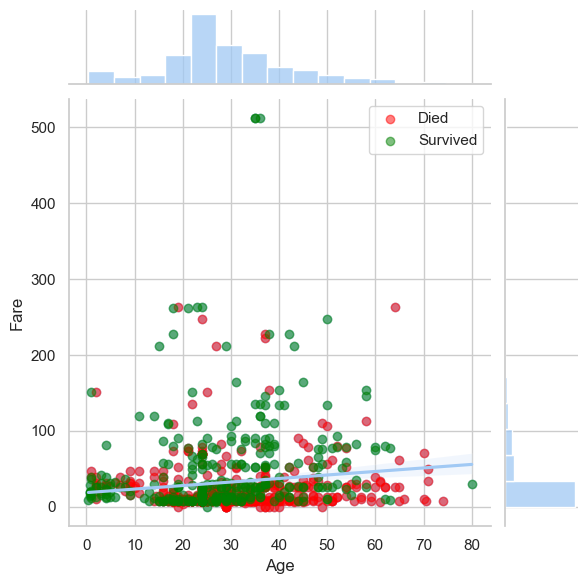

In [141]:
# Multivariate Distribution:
# Make jointplot of age vs fare with:
# Regression line
# Marginal histograms
# Survival status hue
sns.jointplot(
    data=titanic_data,
    x="Age",
    y="Fare",
    kind="reg",
    marginal_kws={"bins": 15, "kde": False}
)

# Then manually add colored points
plt.scatter(
    x=titanic_data[titanic_data['Survived'] == 0]['Age'],
    y=titanic_data[titanic_data['Survived'] == 0]['Fare'],
    color='red',
    alpha=0.5,
    label='Died'
)
plt.scatter(
    x=titanic_data[titanic_data['Survived'] == 1]['Age'],
    y=titanic_data[titanic_data['Survived'] == 1]['Fare'],
    color='green',
    alpha=0.5,
    label='Survived'
)
plt.legend()

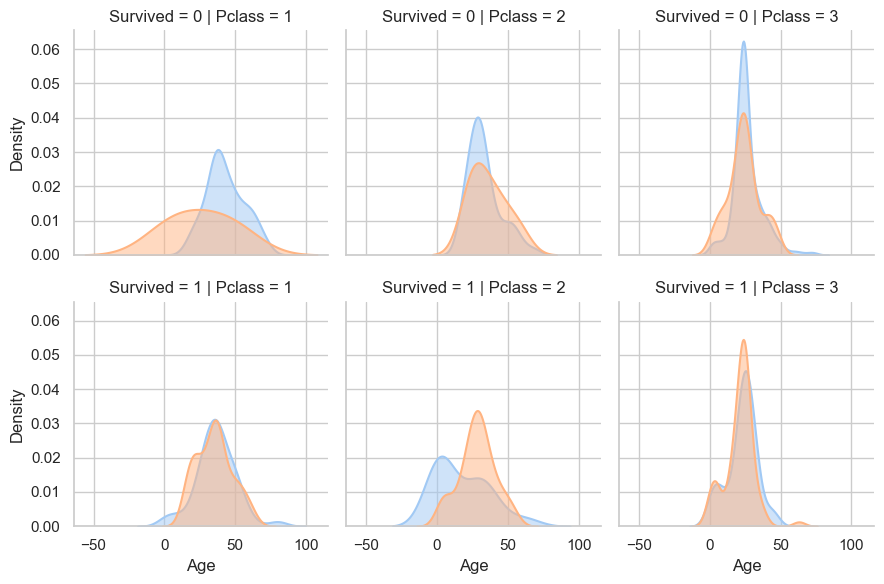

In [142]:
# Faceted Analysis:
# Create FacetGrid showing age distributions:
# Rows: Survival status
# Columns: Passenger class
# Hue: Gender
# Map KDE plots to each facet
grid = sns.FacetGrid(data=titanic_data, row="Survived", col="Pclass", hue="Sex")
grid.map(
    sns.kdeplot,       # Function to apply
    "Age",             # Data column to plot
    fill=True,         # Additional kwargs for kdeplot
    alpha=0.5,         # Transparency
    linewidth=1.5      # Line thickness
)

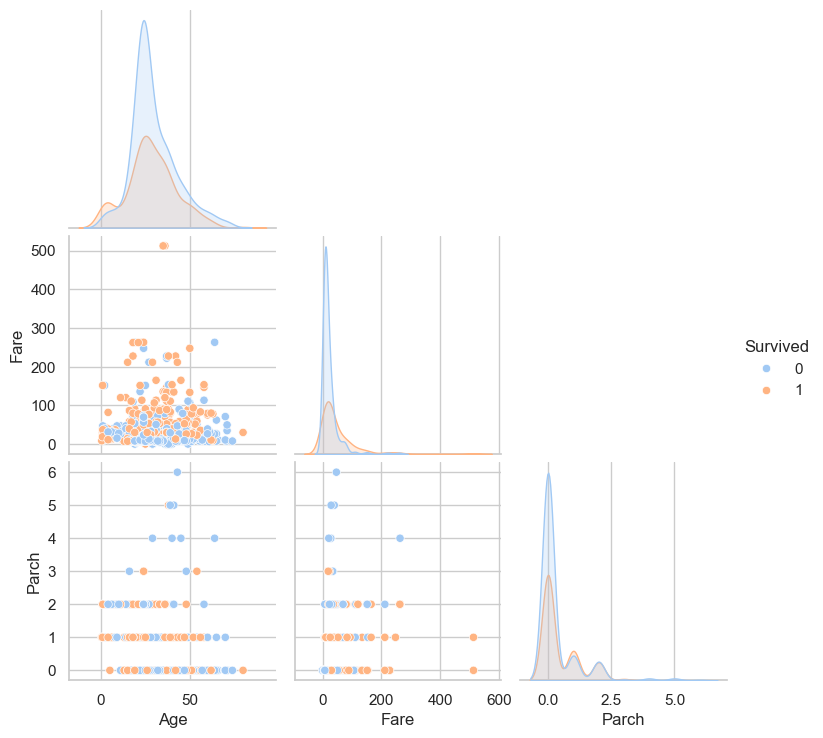

In [143]:
# Pairwise Relationships:
# Generate pairplot for numerical features (Age, Fare, Family Size)
# Use survival hue and set corner=True
sns.pairplot(
    data=titanic_data,
    vars=['Age', 'Fare', 'Parch'],
    corner=True,
    hue="Survived"
)

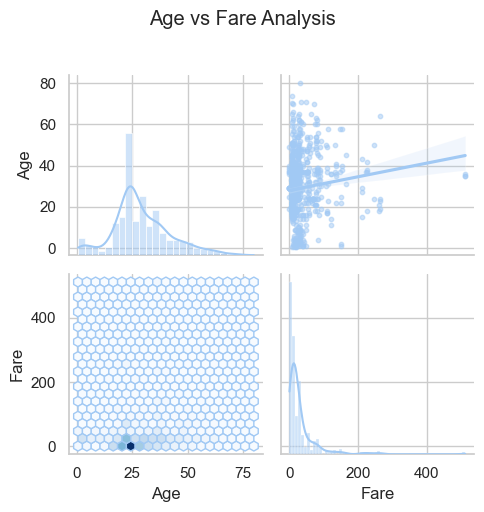

In [144]:
# Custom Grid:
# Build PairGrid comparing Age and Fare:
# Diagonal: Histograms with KDE
# Lower triangle: Hexbin plots
# Upper triangle: Regression plots
# Create PairGrid
g = sns.PairGrid(
    titanic_data,
    vars=['Age', 'Fare']  # Use lowercase column names
)

# Map plots
g.map_diag(sns.histplot, kde=True)          # Diagonal: histograms with KDE
g.map_lower(plt.hexbin, gridsize=20, cmap='Blues')  # Lower: hexbin
g.map_upper(sns.regplot, scatter_kws={'s': 10, 'alpha': 0.5})  # Upper: regression

plt.suptitle('Age vs Fare Analysis', y=1.02)
plt.tight_layout()
plt.show()